In [3]:
import networkx as nx
import numpy as np
import random

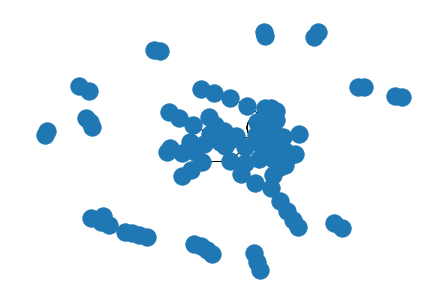

In [ ]:
nx.draw(G)

In [50]:
class Epi_Process():
    def __init__(self,size,percent):
        self.paramertrs_init(size,percent)
        self.graph_init()  
        self.random_start_sample()
    def paramertrs_init(self,size,percent):
        self.size = size
        self.percent = percent
        self.cummulitive_sum_I=0
    def graph_init(self):
        sequence = nx.random_powerlaw_tree_sequence(self.size, tries=5000)
        self.G = nx.configuration_model(sequence)
    def random_start_sample(self):
        self.start_sample_size = int(self.size/100 * self.percent)
        self.S=set(self.G)
        self.I=set()
        self.R=set()
        self.tmp=set()
        self.result=[]
        while len(self.I)<self.start_sample_size:
            self.infect(random.randint(0, self.size))
    def infect(self,x):
        self.S.discard(x)
        if not x in self.R:
            self.I.add(x)
    def recover(self,x):
        self.I.discard(x)
        self.R.add(x)
    def infect_neigh(self,x):
        for neigh in self.G.neighbors(x):
                self.infect(neigh)
    def iterartion(self):
        self.tmp=self.I.copy()
        for x in self.tmp:
            self.infect_neigh(x)
            self.recover(x)
    def run(self):
        while len(self.I) != 0:
            self.result.append(len(self.I))
            self.iterartion()
        self.result.append(len(self.I))

In [52]:
my_proc=Epi_Process(100,5)
my_proc.run()
print(my_proc.S)
print(my_proc.I)
print(my_proc.R)
print(len(my_proc.S)+len(my_proc.I)+len(my_proc.R))
print(my_proc.result)

{0, 9, 34, 37, 54, 61, 69, 74, 75, 87, 90, 92, 97, 99}
set()
{1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 91, 93, 94, 95, 96, 98}
100
[5, 6, 18, 23, 19, 9, 3, 2, 1, 0]
